In [6]:
%matplotlib inline
import matplotlib as mpl
mpl.style.use('/Users/nik/Dropbox/Notebooks/thesisrc.py')
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import pandas as pd
import lvdatatools as lvdt

# SCFMN4

This was a CNT-Al wire tunneling device (despite the name)

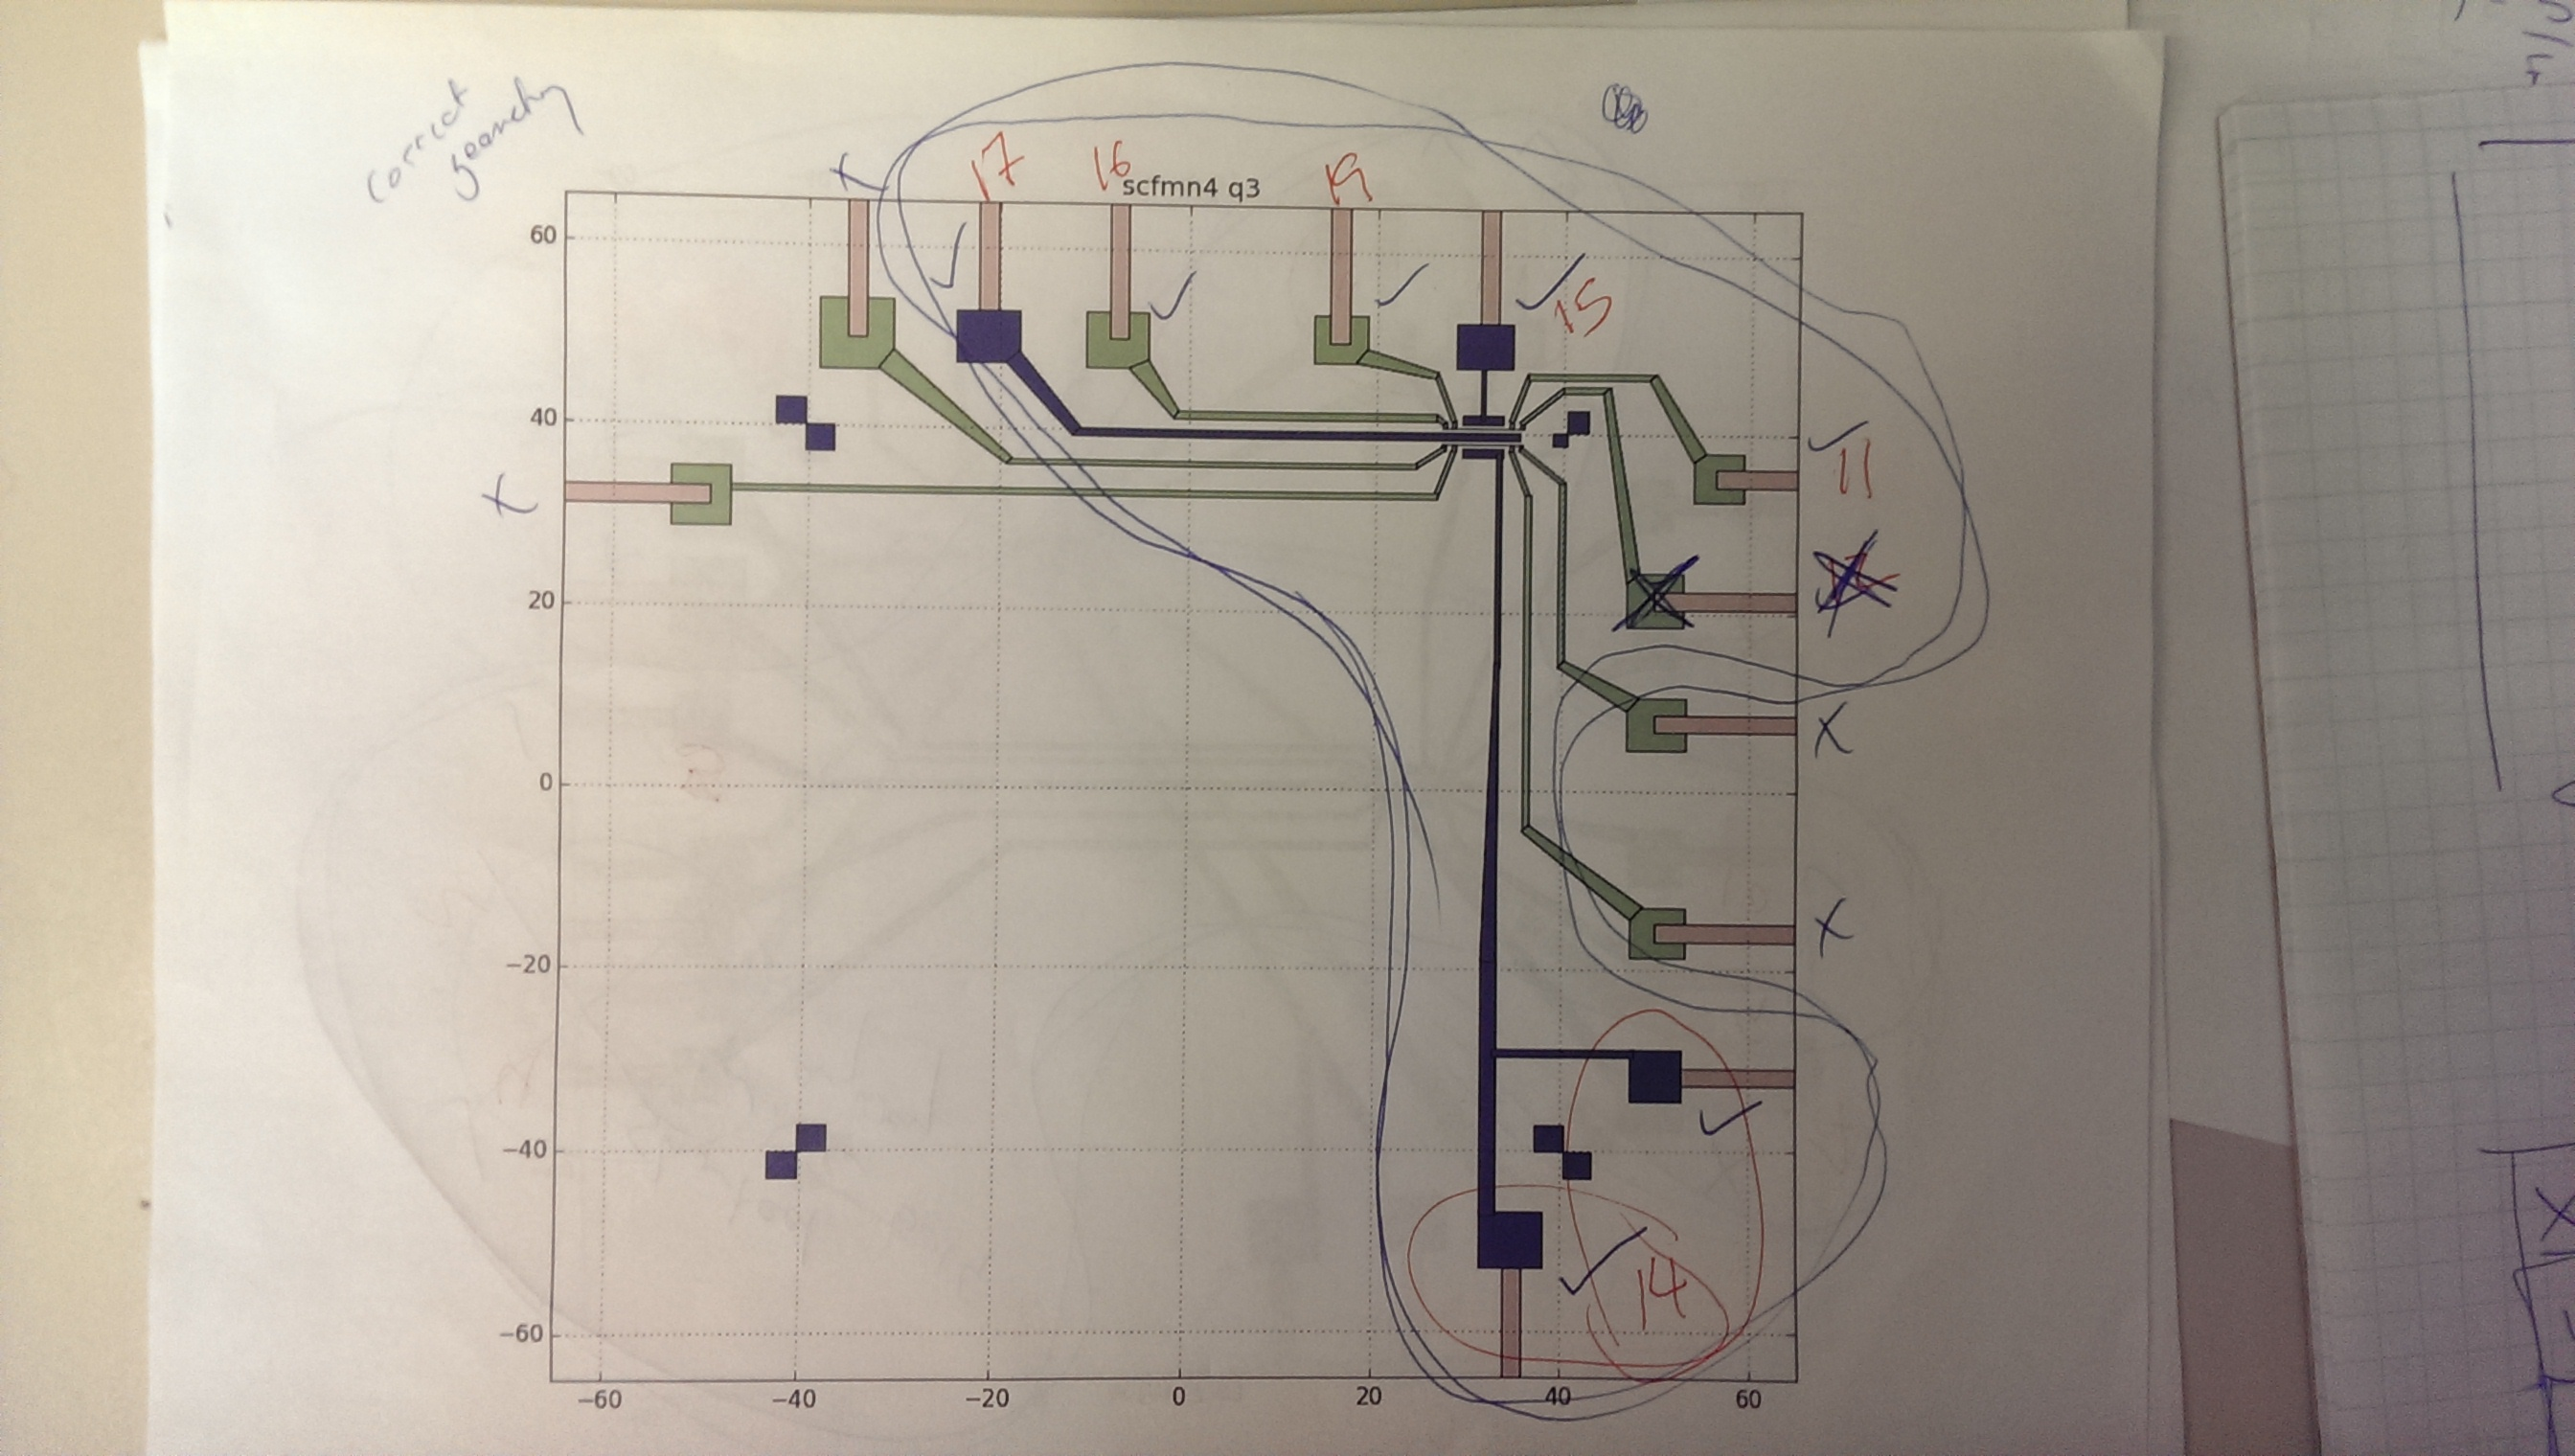

In [9]:
fig_dir = '/Volumes/JUPITER/Data/scfmn4/figures/'
from IPython.display import display, Image

display(Image(os.path.join(fig_dir, 'scfmn4_q3.jpg')))

## Room Temp

In [12]:
data_dir = '/Volumes/JUPITER/Data/scfmn4/room_temp'
flist = []
for i, f in enumerate(glob.glob(os.path.join(data_dir, '*gate*.txt'))):
    s = f.split('/')[-1][:-4]
    print '{0} -- \'{1}\' '.format(i, s)
    flist.append(os.path.join(data_dir, s+'.bin'))

0 -- 'gateswp_2-10_5_a' 
1 -- 'gateswp_2-10_5_b' 


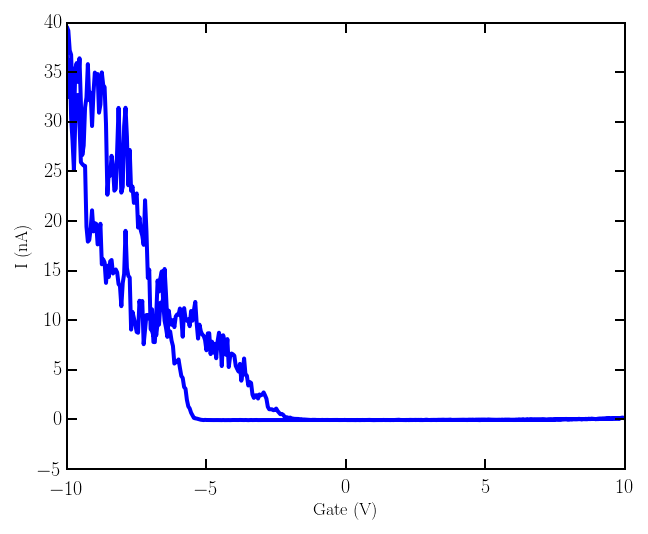

In [34]:
f = os.path.join(data_dir, 'gateswp_2-10_5_a.bin')
df = lvdt.get_data_2d(f)
gf = df.iloc[0:803,:]
fig, ax = plt.subplots()
ax.plot(gf['T'], gf['Iavg']*1e9)
ax.set_xlabel('Gate (V)')
ax.set_ylabel('I (nA)')

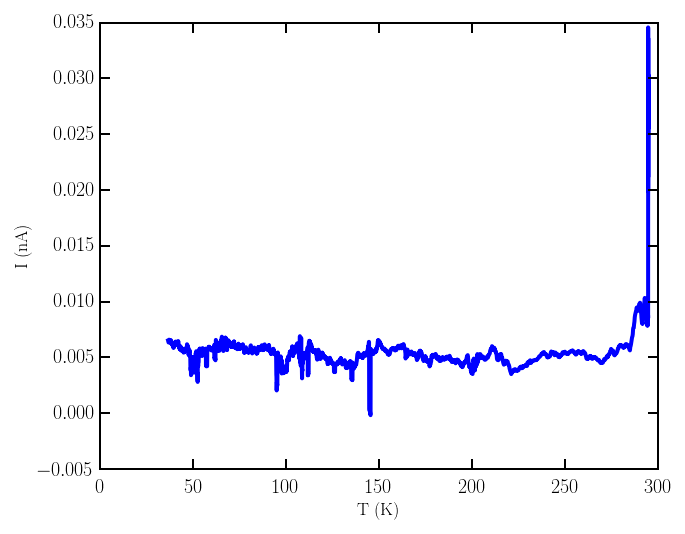

In [41]:
f = os.path.join(data_dir, 'gateswp_2-10_5_a.bin')
df = lvdt.get_data_2d(f)
tf = df.iloc[805:,:]
tf = pd.rolling_mean(tf, 10)
fig, ax = plt.subplots()
ax.plot(tf['T'], tf['Iavg']*1e9+0.065)
ax.set_xlabel('T (K)')
ax.set_ylabel('I (nA)')

## 4K

In [42]:
data_dir = '/Volumes/JUPITER/Data/scfmn4/4K'
flist = []
for i, f in enumerate(glob.glob(os.path.join(data_dir, '*gate*.txt'))):
    s = f.split('/')[-1][:-4]
    print '{0} -- \'{1}\' '.format(i, s)
    flist.append(os.path.join(data_dir, s+'.bin'))

0 -- 'gateswp_15-17_5_a' 
1 -- 'gateswp_15-17_5_b' 
2 -- 'gateswp_15-17_5_c' 
3 -- 'gateswp_15-17_5_d' 
4 -- 'gateswp_2-10_5_a' 
5 -- 'vigate_15-17_5_a' 
6 -- 'vigate_15-17_5_b' 
7 -- 'vigate_15-17_5_c' 


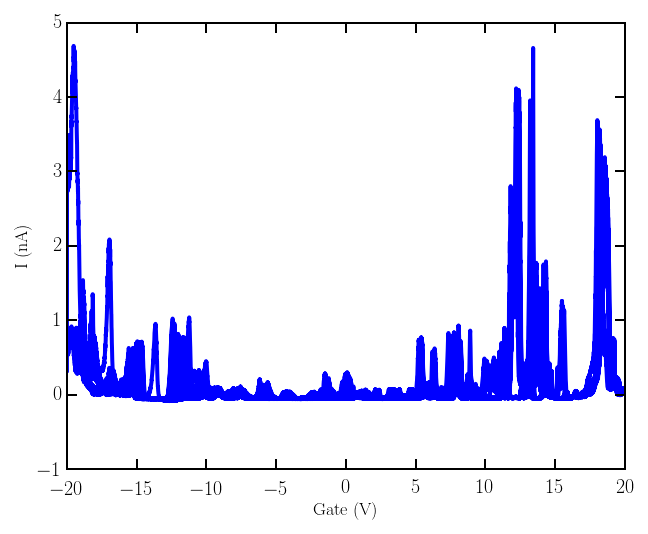

In [52]:
f = os.path.join(data_dir, 'gateswp_15-17_5_d.bin')
df = lvdt.get_data_2d(f)
fig, ax = plt.subplots()
ax.plot(df['Gate'], df['Iavg']*1e9)
ax.set_xlabel('Gate (V)')
ax.set_ylabel('I (nA)')

In [55]:
ind = lvdt.split_sweeps(df, 'Gate')

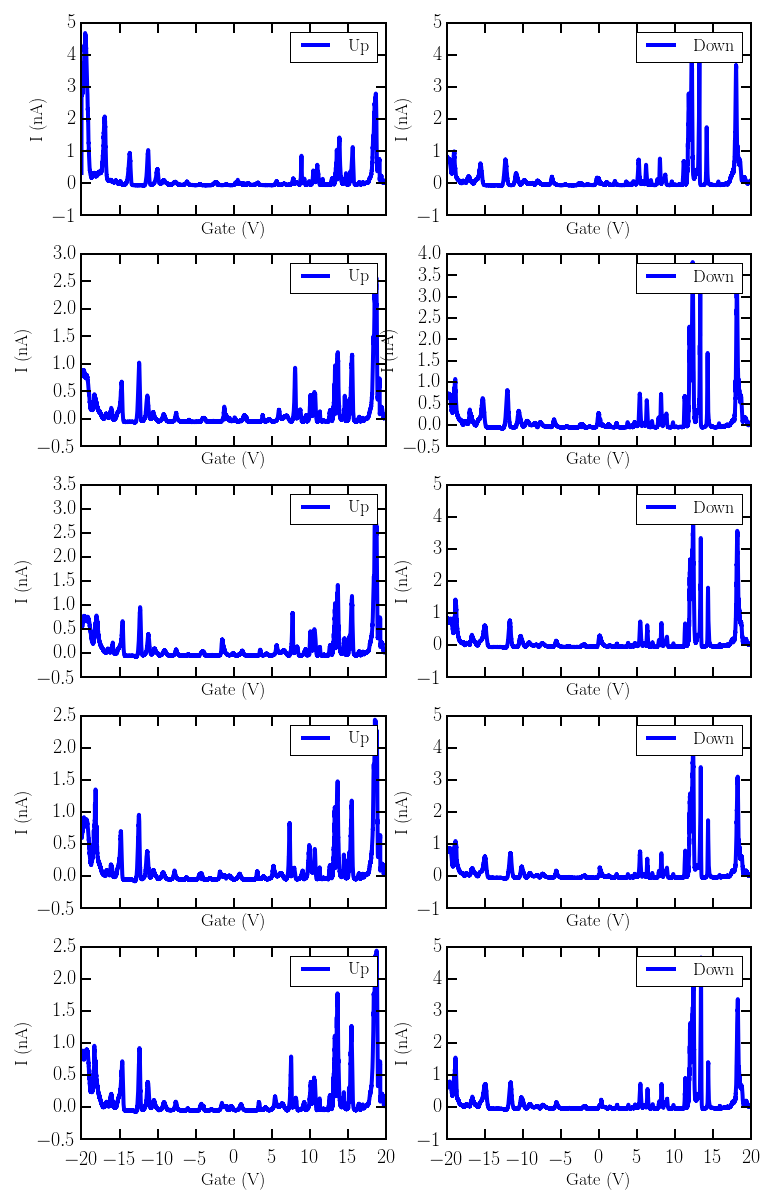

In [63]:
fig, axs = plt.subplots(5,2,sharex = True, sharey=False, 
                        figsize=(12,20))
axs = axs.flat

for i, ax in enumerate(axs):   
    if i%2 == 0:
        l = 'Up'
    else: 
        l = 'Down'
    ax.plot(df['Gate'][ind[i]:ind[i+1]], df['Iavg'][ind[i]:ind[i+1]]*1e9, label = l)
    ax.set_xlabel('Gate (V)')
    ax.set_ylabel('I (nA)')
    ax.legend()

In [69]:
def get_dIdV(df, dV):
    return pd.DataFrame(np.gradient(df,dV)[0], index = df.index, columns = df.columns)

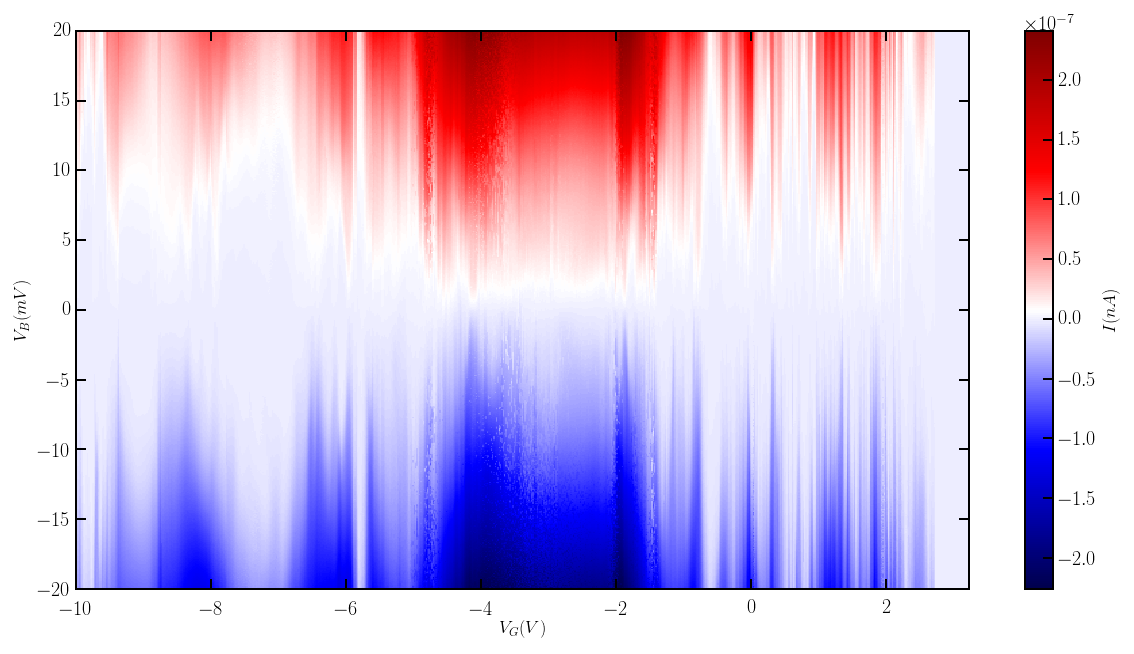

In [76]:
f = os.path.join(data_dir, 'vigate_15-17_5_c.bin')
df = lvdt.get_data_3d(f)
df.index = df.index*1000
df = df.groupby(df.index).mean()

fig, ax = plt.subplots(figsize=(20,10))
limits = lvdt.df_extent(df)
im = ax.imshow(df, extent = limits, 
               cmap = plt.cm.seismic, #vmin = -0.25, vmax = 0.4, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_G (V)$')
ax.set_ylabel(r'$V_B (mV)$')
#ax.set_xlim(0.563, 0.668)
cb = plt.colorbar(im)
cb.set_label(r'$I (nA)$')

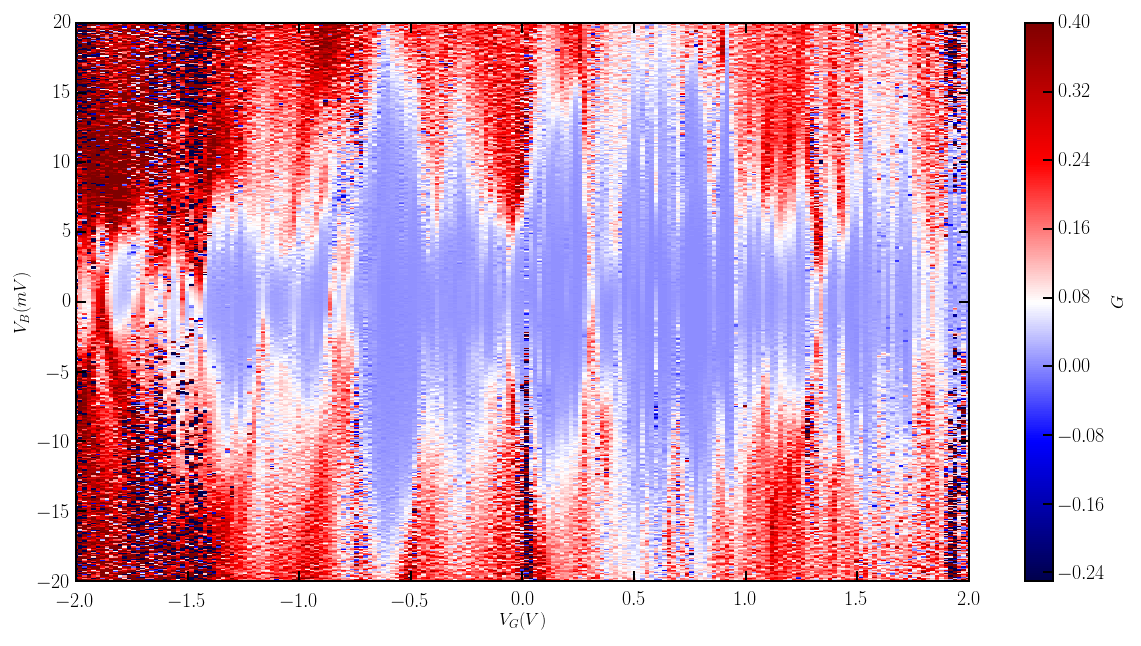

In [79]:
cond = get_dIdV(df, 80e-6)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(cond)
im = ax.imshow(cond/3.875e-5, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.25, vmax = 0.4, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$V_G (V)$')
ax.set_ylabel(r'$V_B (mV)$')
ax.set_xlim(-2, 2)
cb = plt.colorbar(im)
cb.set_label(r'$G$')

What a mess. It blew up shortly after this while I was transfering helium. Balls.